<a href="https://colab.research.google.com/github/Priyagane/K_mean_Project/blob/main/k_mean_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

Loading Dataset

In [42]:
df=pd.read_csv('/content/drive/MyDrive/Data_sets/employee-compensation.csv')
df.tail()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
683272,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43836214,98444.94,0.0,0.0,98444.94,20540.24,15275.18,8019.49,43834.91,142279.85
683273,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43966403,9416.71,0.0,0.0,9416.71,1904.43,1468.77,743.51,4116.71,13533.42
683274,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,44016180,96475.00,0.0,576.0,97051.00,20241.56,14100.16,7897.00,42238.72,139289.72
683275,6,4300,4337,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42423439,115943.00,0.0,0.0,115943.00,24188.37,15275.18,9018.34,48481.89,164424.89
683276,6,4300,4337,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42439576,115943.00,504.9,0.0,116447.90,24188.37,15275.18,9516.61,48980.16,165428.06


Checking the data types of the dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [44]:
df.shape

(683277, 22)

Cleaning Data

Checking the null values 

In [45]:
miss_val = df.isnull().sum()
miss_val

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

Selecting numerical features

In [46]:
data = df.select_dtypes(include=['float64','int64'])
data.head()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,2013,21.0,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,2013,21.0,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,2013,21.0,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,2013,21.0,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,2013,21.0,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


Removing unwanted features

In [47]:
data = data.drop(['Union Code','Year','Organization Group Code','Employee Identifier','Salaries','Overtime','Other Salaries','Retirement','Health and Dental','Other Benefits','Total Compensation'	],axis=1)

In [48]:
data.columns

Index(['Total Salary', 'Total Benefits'], dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Total Salary    683277 non-null  float64
 1   Total Benefits  683277 non-null  float64
dtypes: float64(2)
memory usage: 10.4 MB


In [50]:
data.describe()

,Total Salary,Total Benefits
count,683277.000000,683277.000000
mean,78571.040544,28644.518833
std,55751.218659,17869.713199
min,-68771.780000,-21295.150000
25%,31676.040000,11716.230000
50%,74870.420000,32521.370000
75%,112666.100000,40915.930000
max,658867.570000,151645.180000


Checking for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


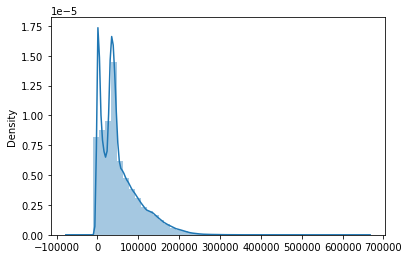

In [51]:
sns.distplot(data)
plt.show()

Total Salary         AxesSubplot(0.125,0.799681;0.133621x0.0803191)
Total Benefits    AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
dtype: object

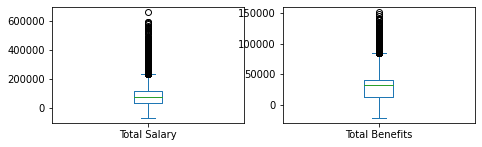

In [52]:
#Bar plot to check the outliers
data.plot(kind='box',subplots=True,layout=(8,5),figsize=(20,20))

In [53]:
data.columns

Index(['Total Salary', 'Total Benefits'], dtype='object')

clearing thec outliers

In [54]:
#Removing outliers
from scipy import stats
import numpy as np

# Calculate the z-scores
z_scores = stats.zscore(data)

abs_z_scores = np.abs(z_scores)

# Select data points with a z-scores above or below 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Filter the dataset
data1 = data[filtered_entries]
data1.shape

(679564, 2)

In [55]:
data1.head()

,Total Salary,Total Benefits
0,57534.65,27747.13
1,57678.50,22216.82
2,63532.93,30116.78
3,94215.92,40021.45
4,5084.00,2428.31


Total Salary         AxesSubplot(0.125,0.799681;0.133621x0.0803191)
Total Benefits    AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
dtype: object

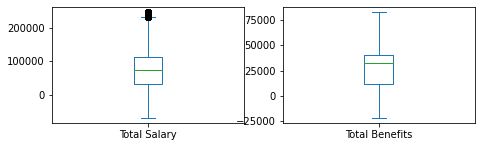

In [56]:
#Bar plot after removing the outliers
data1.plot(kind='box',subplots=True,layout=(8,5),figsize=(20,20))

Distribution Plot on Total Salary

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


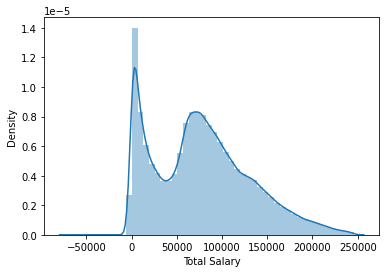

In [57]:
sns.distplot(data1['Total Salary'])
plt.show()

Distribution Plot on Total Benefits

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


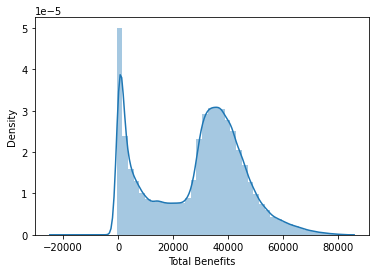

In [58]:
sns.distplot(data1['Total Benefits'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


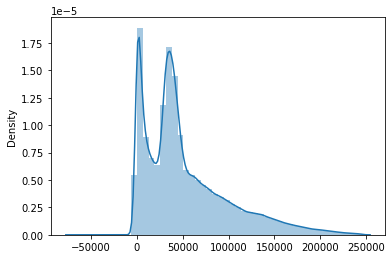

In [59]:
sns.distplot(data1)
plt.show()

In [60]:
data1.describe()

,Total Salary,Total Benefits
count,679564.000000,679564.000000
mean,77487.344944,28417.857350
std,53845.311864,17604.955286
min,-68771.780000,-21295.150000
25%,31306.090000,11545.590000
50%,74543.945000,32431.310000
75%,111816.002500,40771.065000
max,245779.240000,82249.620000


Checking Skewness and Kurtosis

In [61]:
print("Skewness: %f" % data1['Total Salary'].skew())
print("Kurtosis: %f" % data1['Total Salary'].kurt())

Skewness: 0.462901
Kurtosis: -0.347853


In [62]:
print("Skewness: %f" % data1['Total Benefits'].skew())
print("Kurtosis: %f" % data1['Total Benefits'].kurt())

Skewness: -0.167994
Kurtosis: -0.842467


In [63]:
from sklearn.cluster import KMeans

In [64]:
X=data1

Elbow for LMean Clustering

In [65]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

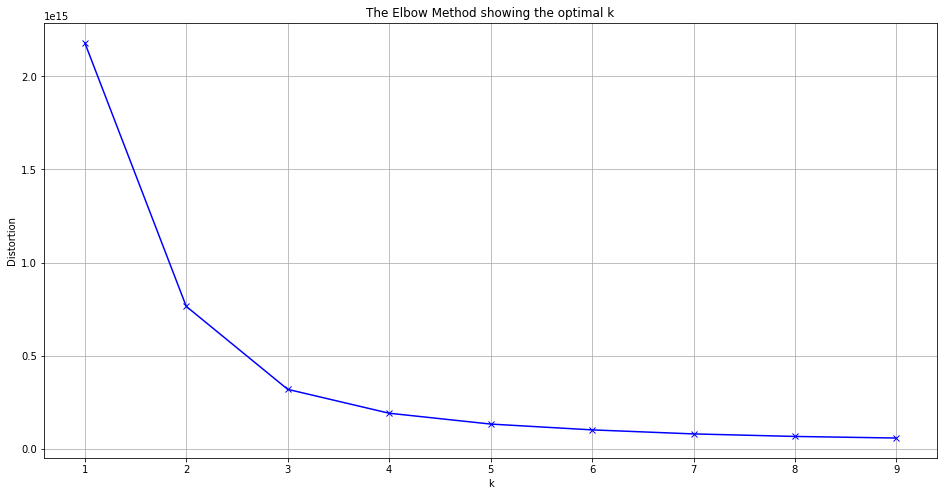

In [66]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [67]:
kmeans=KMeans(n_clusters=3)

In [68]:
kmeans.fit(data1)

KMeans(n_clusters=3)

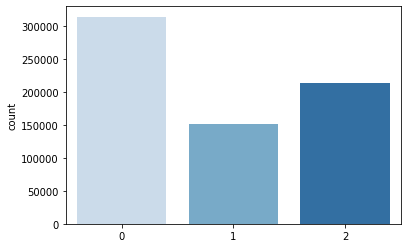

In [69]:
sns.countplot(x=kmeans.labels_, palette='Blues')
plt.show()

In [70]:
y=kmeans.labels_

CPU times: user 19.8 ms, sys: 1.91 ms, total: 21.8 ms
Wall time: 23.7 ms


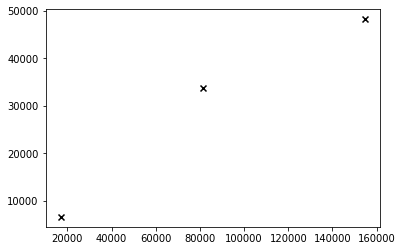

In [71]:
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

Checking the Silhouette score

In [73]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_score(X,y)

0.5886590540048378